In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import re


def load_data_from_db(db_name="fightaging_articles.db"):
    """Loads all articles from the SQLite database into a pandas DataFrame."""
    try:
        conn = sqlite3.connect(db_name)
        # Load the entire table into a DataFrame
        df = pd.read_sql_query("SELECT * FROM articles", conn)
        conn.close()
        
        # Convert publish_date to datetime objects for easier handling
        df['publish_date'] = pd.to_datetime(df['publish_date'])
        
        print(f"Successfully loaded {len(df)} articles from '{db_name}'.")
        return df
    except Exception as e:
        print(f"Could not load data from database. Error: {e}")
        return pd.DataFrame()
    


In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /home/flan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/flan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/flan/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
#
# STEP 1: DATA PREPARATION
#

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def clean_text(text):
    """
    Function to clean the text:
    1. Converts to lowercase.
    2. Removes punctuation and numbers.
    3. Splits the text into words (tokenization).
    4. Removes "stop words" (common English words).
    5. Removes very short words (1 or 2 letters).
    """
    # 1. Lowercase
    text = text.lower()
    
    # 2. Remove punctuation and numbers using regular expressions
    text = re.sub(r'[^a-z\s]', '', text)
    
    # 3. Tokenization (split into words)
    tokens = word_tokenize(text)
    
    # 4. Remove stop words
    stop_words = set(stopwords.words('english'))
    
    # Add some custom words that are very common in this context
    # but don't add much meaning for differentiating topics.
    custom_stop_words = [
        'welcome', 'fight', 'also', 'study', 'research', 'aging', 'age', 'may', 
        'however', 'results', 'data', 'found', 'open', 'access', 
        'great', 'deal', 'one', 'even', 'work'
    ]    
    stop_words.update(custom_stop_words)
    
    filtered_tokens = [word for word in tokens if word not in stop_words]
    
    # 5. Remove very short words
    filtered_tokens = [word for word in filtered_tokens if len(word) > 2]
    
    # Join the words back into a single string
    return " ".join(filtered_tokens)


# --- Visualize ---

if __name__ == "__main__":
    articles_df = load_data_from_db()

    if not articles_df.empty:
        # Combinamos título y cuerpo para un análisis más completo
        articles_df['full_text'] = articles_df['title'] + ' ' + articles_df['body']
        
        print("\nLimpiando y preprocesando el texto de los artículos...")
        # Aplicamos la función de limpieza a cada artículo
        articles_df.loc[0:9, 'cleaned_text'] = articles_df.loc[0:9, 'full_text'].apply(clean_text)

        
        # Mostramos una comparación del antes y el después para el segundo artículo (índice 1)
        print("\nEjemplo de limpieza (para el artículo en la posición 1):")
        print("--- TEXTO ORIGINAL ---")
        # Usamos .iloc[1] para obtener el segundo artículo
        print(articles_df['full_text'].iloc[1]) 

        print("\n--- TEXTO LIMPIO ---")
        # Usamos .iloc[1] nuevamente para obtener el texto limpio del mismo artículo
        print(articles_df['cleaned_text'].iloc[1])

        # Si quieres ver todos los 10 textos que limpiaste:
        print("\n--- PRIMEROS 10 RESULTADOS LIMPIOS ---")
        print(articles_df['cleaned_text'].head(10))


Successfully loaded 18753 articles from 'fightaging_articles.db'.

Limpiando y preprocesando el texto de los artículos...

Ejemplo de limpieza (para el artículo en la posición 1):
--- TEXTO ORIGINAL ---
The Fight Aging! Disclaimer Please read this disclaimer carefully. It is a commonsense statement that should apply to all health information you find online. Your health is valuable and easily damaged. What is good advice for one person may not be good advice for another: people vary considerably in health matters. Information provided on Fight Aging! should always be discussed with a qualified physician. It is not intended to replace the relationship between you and your physician. It is recommended that you follow up with your own research on topics that interest you. The Internet is powerful tool for research. Take advantage of it! At the same time, be cautious. Be skeptical and search out support for any claim. If a claim has any merit, there will be many reputable sources of inform

In [4]:
# visualizar_pkl.py
import pandas as pd

# Asegúrate de que el nombre del archivo coincida con el que guardaste
file_name = "articles_cleaned.pkl"

try:
    # Cargar el DataFrame desde el archivo pickle
    articles_df = pd.read_pickle(file_name)
    
    print(f"Archivo '{file_name}' cargado exitosamente.")
    print("-" * 30)

    # --- Diferentes formas de "visualizar" los datos ---

    # 1. Ver la estructura general del DataFrame
    print("\n## 1. Información General del DataFrame (df.info()) ##")
    articles_df.info()
    print("-" * 30)

    # 2. Ver las primeras 5 filas para tener una idea del contenido
    print("\n## 2. Primeras 5 Filas (df.head()) ##")
    # pd.set_option para asegurar que vemos el texto completo si es muy largo
    pd.set_option('display.max_colwidth', 100) 
    print(articles_df.head())
    print("-" * 30)

    # 3. Ver solo las columnas que nos interesan para el análisis de texto
    print("\n## 3. Vista selectiva de columnas (Título y Texto Limpio) ##")
    print(articles_df[['publish_date', 'title', 'cleaned_text']].head())

except FileNotFoundError:
    print(f"Error: El archivo '{file_name}' no se encontró.")
    print("Asegúrate de haber ejecutado primero el script de limpieza (Paso 1).")
except Exception as e:
    print(f"Ocurrió un error al cargar el archivo: {e}")

Archivo 'articles_cleaned.pkl' cargado exitosamente.
------------------------------

## 1. Información General del DataFrame (df.info()) ##
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18753 entries, 0 to 18752
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             18753 non-null  int64         
 1   url            18753 non-null  object        
 2   publish_date   18753 non-null  datetime64[ns]
 3   title          18753 non-null  object        
 4   body           18753 non-null  object        
 5   quotes         18753 non-null  object        
 6   external_link  12728 non-null  object        
 7   full_text      18753 non-null  object        
 8   cleaned_text   18753 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 1.3+ MB
------------------------------

## 2. Primeras 5 Filas (df.head()) ##
   id  \
0   1   
1   2   
2   3   
3   4   
4   5  

Analizando los bigramas más comunes...


/tmp/ipykernel_22535/2056794431.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='bigram', data=bigram_df, palette='viridis')


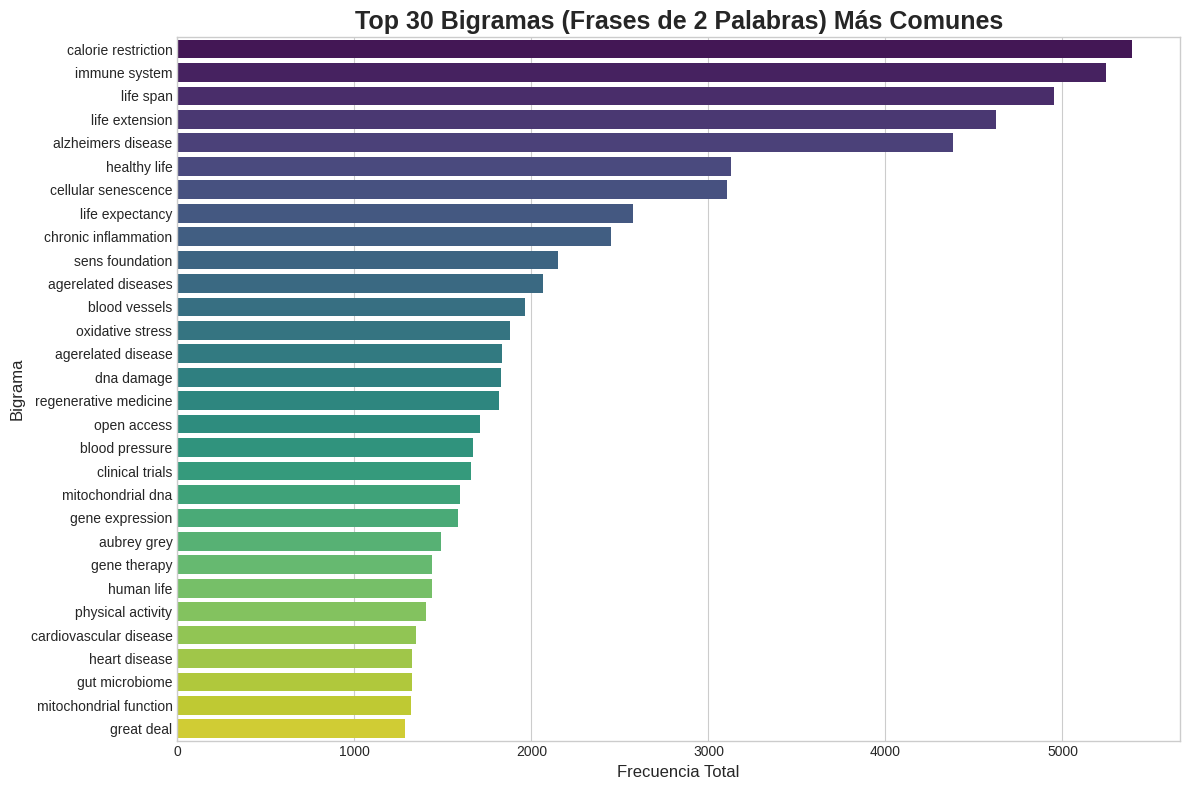

In [5]:
# Importamos las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

# Carga tu DataFrame limpio
df = pd.read_pickle("articles_cleaned.pkl")

# --- Análisis de Bigramas ---
print("Analizando los bigramas más comunes...")

# Configuramos el vectorizador para que busque frases de 2 palabras (n_gram_range=(2,2))
# y que solo considere las 30 más frecuentes (max_features=30)
vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=30)

# Aplicamos el vectorizador a nuestro texto limpio
bigram_matrix = vectorizer.fit_transform(df['cleaned_text'])

# Sumamos las ocurrencias de cada bigrama
sum_bigrams = bigram_matrix.sum(axis=0)
words_freq = [(word, sum_bigrams[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

# Convertimos a un DataFrame de Pandas para graficarlo fácilmente
bigram_df = pd.DataFrame(words_freq, columns=['bigram', 'count'])

# --- Visualización ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='bigram', data=bigram_df, palette='viridis')
plt.title('Top 30 Bigramas (Frases de 2 Palabras) Más Comunes', fontsize=18, weight='bold')
plt.xlabel('Frecuencia Total', fontsize=12)
plt.ylabel('Bigrama', fontsize=12)
plt.tight_layout()
plt.savefig('top_bigrams.png', dpi=300)
plt.show()

Generando nube de palabras general...


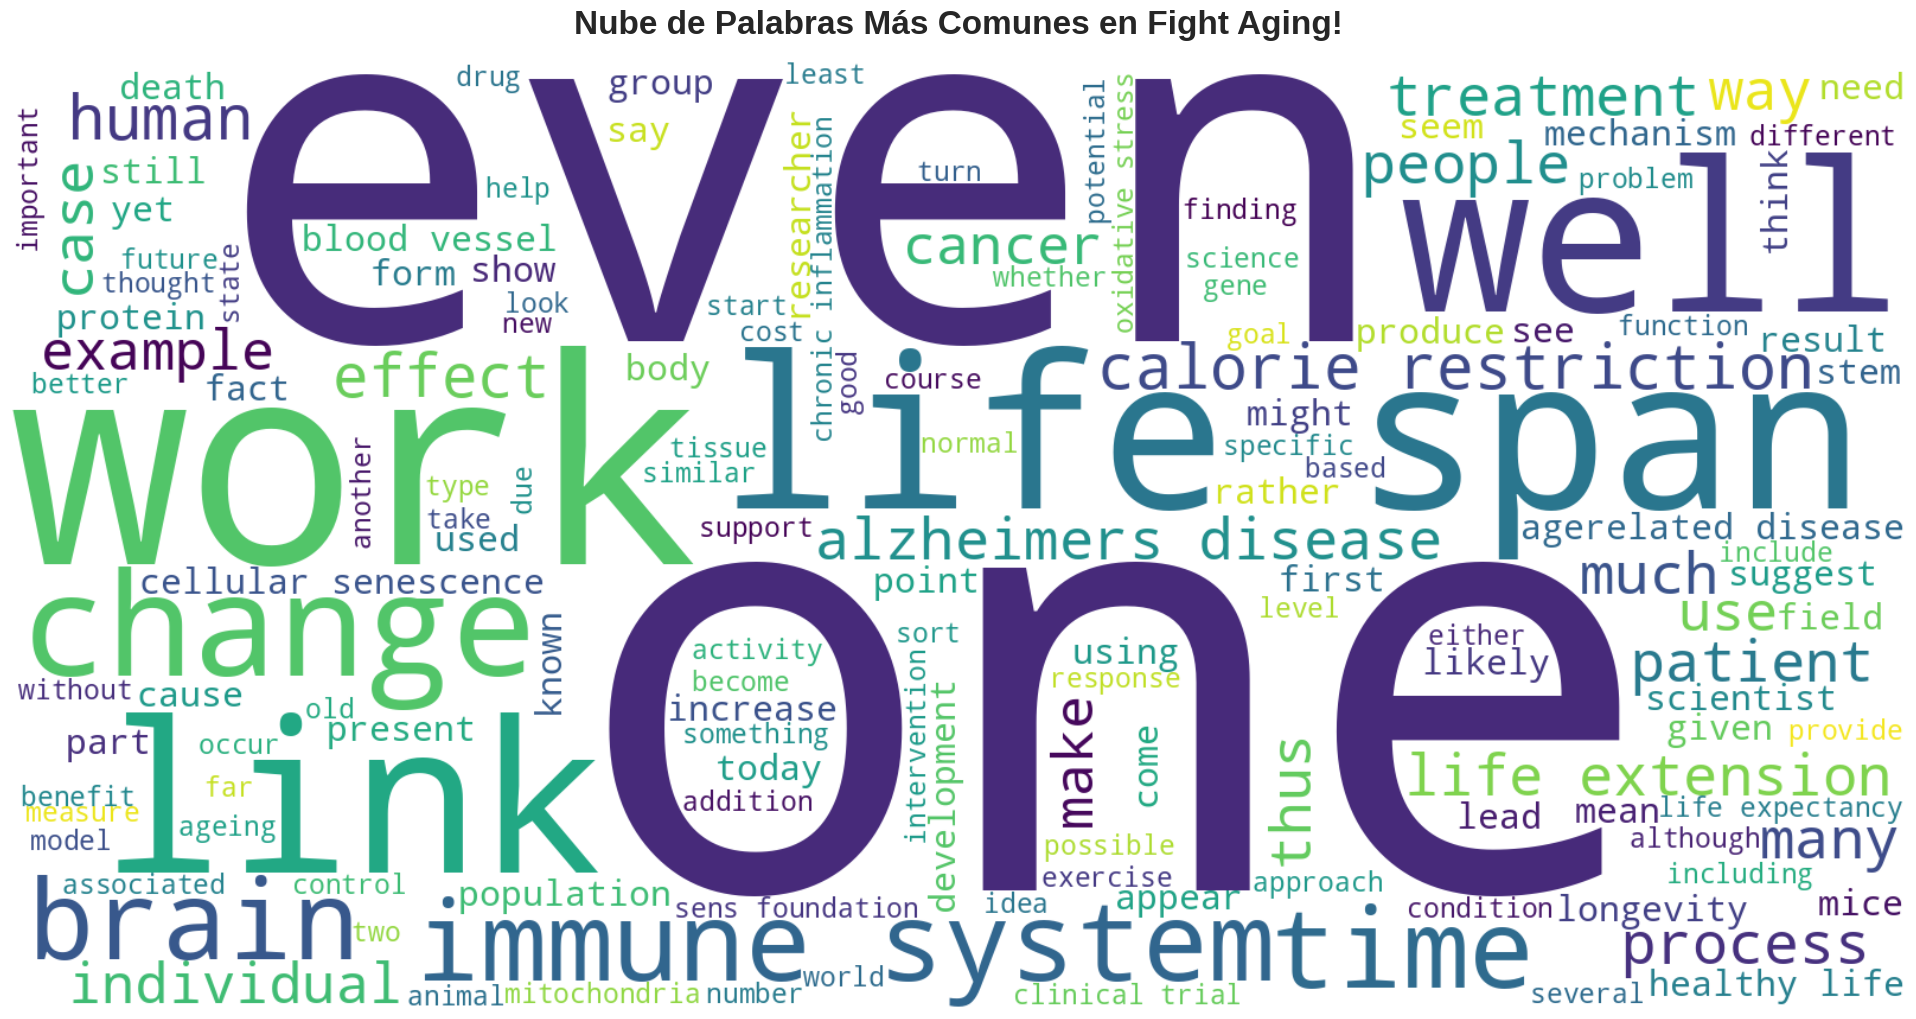

In [6]:
# nubes.py
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Carga tu DataFrame limpio (el que regeneraste con la lista de stop words corregida)
df = pd.read_pickle("articles_cleaned.pkl")

print("Generando nube de palabras general...")

# Une todo el texto limpio en un solo string gigante
full_text_corpus = " ".join(df['cleaned_text'])

# Crea el objeto WordCloud
wordcloud = WordCloud(
    width=1600, 
    height=800, 
    background_color='white', 
    colormap='viridis',
    max_words=150 # Puedes ajustar el número de palabras a mostrar
).generate(full_text_corpus)

# Muestra y guarda la imagen
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off') # No mostrar los ejes
plt.title('Nube de Palabras Más Comunes en Fight Aging!', fontsize=24, weight='bold', pad=20)
plt.tight_layout(pad=0)
plt.savefig('wordcloud_general.png', dpi=300)
plt.show()

In [ ]:
# bigramas_por_era.py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

# Carga tu DataFrame limpio
df = pd.read_pickle("articles_cleaned.pkl")

# Definimos nuestras eras
eras = {
    'Era Inicial (2004-2010)': (df['publish_date'].dt.year >= 2004) & (df['publish_date'].dt.year <= 2010),
    'Era Media (2011-2017)': (df['publish_date'].dt.year >= 2011) & (df['publish_date'].dt.year <= 2017),
    'Era Reciente (2018-2025)': (df['publish_date'].dt.year >= 2018) & (df['publish_date'].dt.year <= 2025)
}

# Preparamos una figura con 3 subplots (uno al lado del otro)
fig, axes = plt.subplots(1, 3, figsize=(32, 18), sharex=True)
fig.suptitle('Evolución de Temas: Top 15 Bigramas por Era', fontsize=24, weight='bold')

vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=15)

for i, (era_name, era_filter) in enumerate(eras.items()):
    print(f"Analizando bigramas para la {era_name}...")
    
    # Filtra el DataFrame para la era actual
    df_era = df[era_filter]
    
    if df_era.empty:
        continue
        
    # Calcula los bigramas solo para esa era
    bigram_matrix = vectorizer.fit_transform(df_era['cleaned_text'])
    sum_bigrams = bigram_matrix.sum(axis=0)
    words_freq = sorted([(word, sum_bigrams[0, idx]) for word, idx in vectorizer.vocabulary_.items()], key=lambda x: x[1], reverse=True)
    bigram_df = pd.DataFrame(words_freq, columns=['bigram', 'count'])
    
    # Dibuja el gráfico en el subplot correspondiente
    sns.barplot(x='count', y='bigram', data=bigram_df, ax=axes[i], palette='viridis')
    axes[i].set_title(era_name, fontsize=16)
    axes[i].set_xlabel('Frecuencia', fontsize=12)
    axes[i].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Ajustar para el título principal
plt.savefig('bigrams_por_era.png', dpi=300)
plt.show()

Analizando bigramas para la Era Inicial (2004-2010)...


/tmp/ipykernel_22535/2294451847.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='bigram', data=bigram_df, ax=axes[i], palette='viridis')


Analizando bigramas para la Era Media (2011-2017)...


/tmp/ipykernel_22535/2294451847.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='bigram', data=bigram_df, ax=axes[i], palette='viridis')


Analizando bigramas para la Era Reciente (2018-2025)...


/tmp/ipykernel_22535/2294451847.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='bigram', data=bigram_df, ax=axes[i], palette='viridis')
